In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import random
import matplotlib.pyplot as plt
import time

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

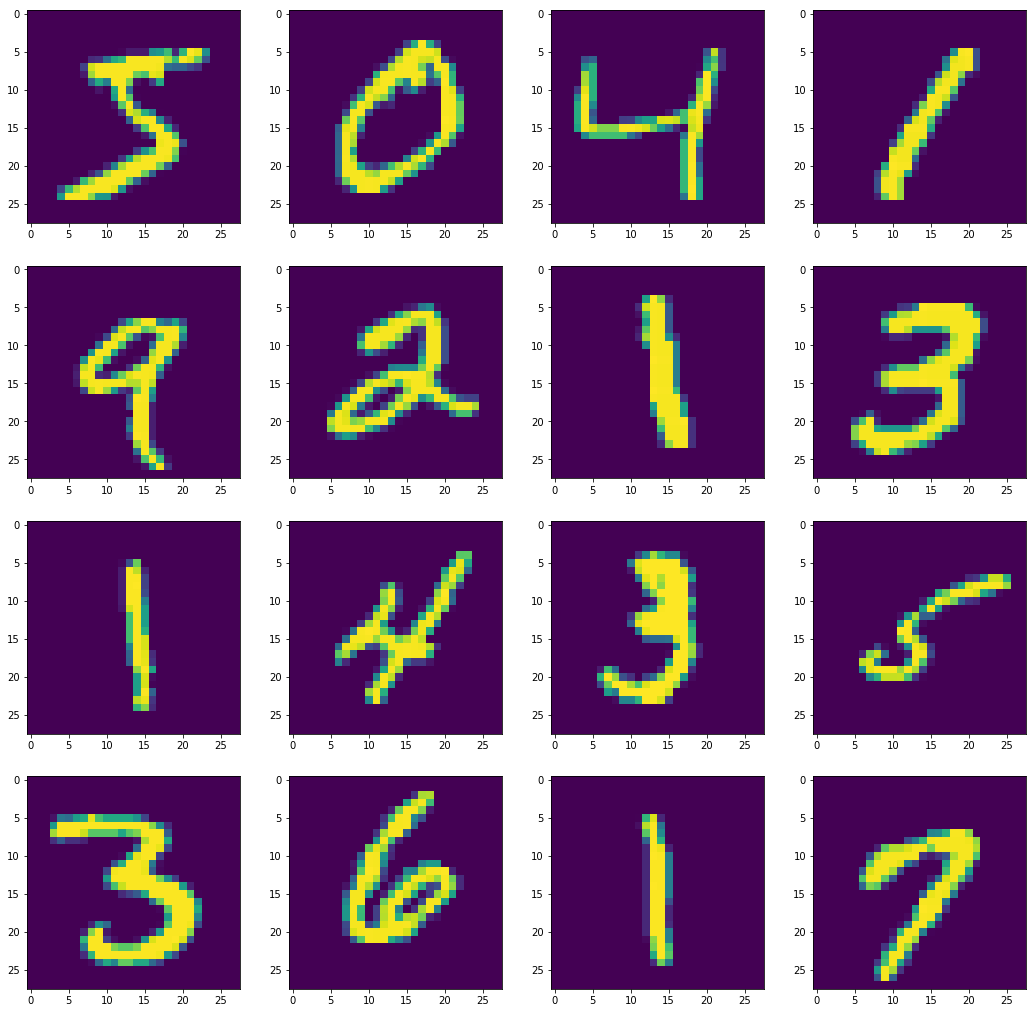

In [38]:
fig=plt.figure(figsize=(18, 18))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = x_train[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [3]:
x_train = x_train/255.
x_test = x_test/255.

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [4]:
#build the model
#default model from the tensorflow guide
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    x_train, y_train,
    epochs=6,
    validation_data=(x_test,y_test)
)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2596 - accuracy: 0.9258 - val_loss: 0.1450 - val_accuracy: 0.9570
Epoch 2/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1146 - accuracy: 0.9657 - val_loss: 0.0952 - val_accuracy: 0.9715
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9759 - val_loss: 0.0841 - val_accuracy: 0.9755
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0603 - accuracy: 0.9817 - val_loss: 0.0748 - val_accuracy: 0.9781
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9865 - val_loss: 0.0864 - val_accuracy: 0.9749
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0675 - val_accuracy: 0.9802


In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
                                  keras.layers.MaxPooling2D(2,2),
                                  keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                  keras.layers.MaxPooling2D(2,2),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(128, activation = tf.nn.relu),
                                  keras.layers.Dense(32, activation = tf.nn.relu),
                                  keras.layers.Dense(10, activation = tf.nn.softmax)])
#model.summary()

In [6]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
start = time.time()
model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test), batch_size = 30)
end = time.time()
print(end - start)

2000/2000 [==============================] - 95s 47ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0284 - val_accuracy: 0.9923
94.73457646369934


In [ ]:
#visualisation

In [9]:
layer_outputs = [layer.output for layer in model.layers[0:3]]
visual_output = keras.models.Model(inputs = model.input, outputs = layer_outputs)
random_input = random.choice(x_train)
random_input = random_input.reshape((1,) + random_input.shape)
#random_input = random_input/255.
#random_input = random_input.astype('float32')

In [ ]:
#Visualise feature maps of 1st conv2d layer 

In [19]:
feature_maps = visual_output.predict(random_input)

layer_names = [layer.name for layer in model.layers]
square = 8
ix = 1
for x in range(square):
    for y in range(square):
        ax = plt.subplot(square, square, ix) #specify subplot and axis turn
        ax.set_xticks([])
        ax.set_yticks([])
        #plot filter channel in grayscale
        plt.imshow(feature_maps[0][0,:,:,ix-1])
        ix+=1
#show image
plt.show()

In [ ]:
#Visualise feature maps of 2nd conv2d layer

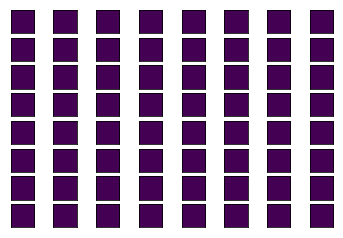

In [28]:
square = 8
ix = 1
for x in range(square):
    for y in range(square):
        ax = plt.subplot(square, square, ix) #specify subplot and axis turn
        ax.set_xticks([])
        ax.set_yticks([])
        #plot filter channel in grayscale
        plt.imshow(feature_maps[2][0,:,:,ix-1])
        ix+=1
#show image
plt.show()